# Train sizing
---------------------------------

This example shows how to asses a model's performance based on the size of the training set.

The data used is a variation on the Australian weather dataset from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. The goal of this dataset is to predict whether or not it will rain tomorrow training a binay classifier on target RainTomorrow.

## Load the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load the Australian weather dataset
X = pd.read_csv('./datasets/weatherAUS.csv')

# Let's have a look at a subset of the data
X.sample(frac=1).iloc[:5, :8]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
131534,Launceston,13.3,16.7,28.0,NaN,NaN,NW,61.0
20368,NorahHead,15.1,23.1,0.0,NaN,NaN,SSE,41.0
13071,Moree,7.5,27.6,0.0,5.2,10.2,WNW,39.0
73084,Portland,10.0,21.6,0.0,6.2,8.5,E,26.0
32906,SydneyAirport,19.6,29.3,0.0,4.0,6.4,WNW,69.0


## Run the pipeline

In [3]:
# Initialize ATOM and prepare the data
atom = ATOMClassifier(X, verbose=2, random_state=1)
atom.impute(strat_num='median', strat_cat='most_frequent', min_frac_rows=0.8)
atom.encode()

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Applying data cleaning...
 --> Label-encoding the target column.

Dataset stats ================= >>
Shape: (142193, 22)
Missing values: 316559
Categorical columns: 5
Scaled: False
----------------------------------
Train set size: 113755
Test set size: 28438
----------------------------------
Dataset balance: No:Yes <==> 3.5:1.0
----------------------------------
Instances in RainTomorrow per class:
|        |    total |    train_set |    test_set |
|:-------|---------:|-------------:|------------:|
| 0: No  |   110316 |        88263 |       22053 |
| 1: Yes |    31877 |        25492 |        6385 |

Fitting Imputer...
Imputing missing values...
 --> Dropping 15182 rows for containing less than 80% non-missing values.
 --> Imputing 100 missing values with median in feature MinTemp.
 --> Imputing 57 missing values with median in feature MaxTemp.
 --> Imputing 640 missing values with median in featur

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Encoding categorical columns...
 --> LeaveOneOut-encoding feature Location. Contains 45 unique categories.
 --> LeaveOneOut-encoding feature WindGustDir. Contains 16 unique categories.
 --> LeaveOneOut-encoding feature WindDir9am. Contains 16 unique categories.
 --> LeaveOneOut-encoding feature WindDir3pm. Contains 16 unique categories.
 --> Label-encoding feature RainToday. Contains 2 unique categories.


In [4]:
# We can analyze the impact of the training set's size on a LightGBM model
atom.train_sizing('lgb', train_sizes=np.linspace(0.1, 1, 9), bagging=4)


Training ===================================== >>
Models: LGB
Metric: f1


Run: 0 ================================ >>
Size of training set: 10160 (10%)
Size of test set: 25402


Results for LightGBM:         
Fit ---------------------------------------------
Score on the train set --> f1: 0.8180
Score on the test set  --> f1: 0.6101
Time elapsed: 0.729s
Bagging -----------------------------------------
Score --> f1: 0.5947 ± 0.0046
Time elapsed: 1.577s
-------------------------------------------------
Total time: 2.317s


Final results ========================= >>
Duration: 2.319s
------------------------------------------
LightGBM --> f1: 0.595 ± 0.005 ~


Run: 1 ================================ >>
Size of training set: 21591 (21%)
Size of test set: 25402


Results for LightGBM:         
Fit ---------------------------------------------
Score on the train set --> f1: 0.7361
Score on the test set  --> f1: 0.6279
Time elapsed: 0.946s
Bagging -----------------------------------------
Sc

## Analyze the results

In [5]:
# Note that the results dataframe now is multi-index
atom.results

,,metric_train,metric_test,time_fit,mean_bagging,std_bagging,time_bagging,time
frac,model,,,,,,,
0.100,LGB,0.817968,0.610102,0.729s,0.594748,0.00457747,1.577s,2.317s
0.213,LGB,0.736086,0.627931,0.946s,0.616375,0.00566304,2.057s,3.007s
0.325,LGB,0.705598,0.625811,1.163s,0.621507,0.00349161,2.506s,3.674s
0.438,LGB,0.689969,0.639192,1.380s,0.62671,0.0028187,3.018s,4.402s
0.550,LGB,0.681329,0.636177,1.648s,0.628191,0.00342566,3.556s,5.209s
0.662,LGB,0.679434,0.639664,1.891s,0.635238,0.00274304,4.162s,6.058s
0.775,LGB,0.676917,0.640345,2.053s,0.63302,0.00235894,4.509s,6.569s
0.888,LGB,0.668689,0.642228,2.358s,0.635387,0.00414126,5.074s,7.439s
1.000,LGB,0.666853,0.644936,2.606s,0.637363,0.00233264,5.634s,8.247s


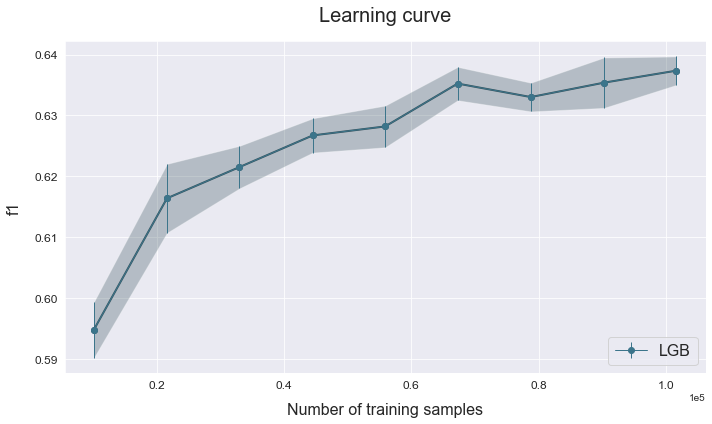

In [6]:
# Plot the train sizing's results
atom.plot_learning_curve()